# Import all the libraries here

In [45]:
import os
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import random

In [8]:
# check if torch is using gpu or not
print(torch.cuda.is_available()) # if gpu is available
print(torch.cuda.device_count()) # number of gpu
print(torch.cuda.get_device_name()) # name of the gpu

True
1
NVIDIA GeForce GTX 1650


# Data Preprocessing

- Download the raw images from [Kaggle](https://www.kaggle.com/datasets/cyanex1702/oceanic-life-dataset).
- Put the raw images in `data/raw` folder to continue.
- We have to do several preprocessing steps to make them ready to be used for the model.

## Remove corrupted images first using Tensorflow

In [12]:
def remove_invalid_images(folder_path):
    removed = 0
    for root, _, files in os.walk(folder_path):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                img_read = tf.io.read_file(fpath)
                img_2 = tf.image.decode_image(img_read)
            
            except tf.errors.InvalidArgumentError:
                print(f"Removing: {fpath}")
                os.remove(fpath)
                removed += 1
    print(f"Removed {removed} corrupted/invalid images from {folder_path}")

In [18]:
remove_invalid_images("../data/raw")

I0000 00:00:1744707321.300810   11862 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1712 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:03:00.0, compute capability: 7.5
2025-04-15 10:55:21.547760: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36559800 exceeds 10% of free system memory.
2025-04-15 10:55:21.613372: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37139271 exceeds 10% of free system memory.


Removing: ../data/raw/n2e8cyel.jpg


2025-04-15 10:55:21.900787: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
2025-04-15 10:55:22.378481: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35028642 exceeds 10% of free system memory.
2025-04-15 10:55:22.521556: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35149920 exceeds 10% of free system memory.
2025-04-15 10:55:23.032023: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47995497 exceeds 10% of free system memory.


Removing: ../data/raw/jwj3lskh.jpg


2025-04-15 10:55:26.192909: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing: ../data/raw/2omx90r5.jpg
Removing: ../data/raw/0mcjhejq.png


2025-04-15 10:55:28.765412: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing: ../data/raw/gfio54rm.jpg
Removing: ../data/raw/dtycq445.jpg
Removing: ../data/raw/jy8a7002.jpg
Removing: ../data/raw/ofbgsedd.jpg


2025-04-15 10:55:36.896745: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing: ../data/raw/rensxknv.jpg
Removing: ../data/raw/scrxf3aw.jpg


2025-04-15 10:55:45.047239: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/ajldgtd3.jpg
Removing: ../data/raw/8jhbzfsm.jpg
Removing: ../data/raw/dezp8w0b.jpg
Removing: ../data/raw/7khefuvu.jpg
Removing: ../data/raw/zlmj9ply.jpg
Removing: ../data/raw/ngukj7a0.jpg


2025-04-15 10:55:48.538806: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing: ../data/raw/afqx808u.jpg
Removing: ../data/raw/vqo7rmse.jpg
Removing: ../data/raw/fenhwj9k.jpg
Removing: ../data/raw/aiuy0d4p.jpg


2025-04-15 10:55:49.970824: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/um6hy222.png
Removing: ../data/raw/c206f4k6.jpg
Removing: ../data/raw/blxddkzc.jpg
Removing: ../data/raw/pzmxp4il.jpg


2025-04-15 10:56:05.990366: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/jz37ml67.jpg
Removing: ../data/raw/cer2khr0.jpg
Removing: ../data/raw/5dkrywrb.jpg


2025-04-15 10:56:08.552015: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/uxjl82go.jpg


2025-04-15 10:56:08.873133: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/llcyuiir.jpg


2025-04-15 10:56:10.562261: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/upyvd3qx.jpg
Removing: ../data/raw/u381fiz6.jpg
Removing: ../data/raw/0x90oa3d.jpg


2025-04-15 10:56:14.317851: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing: ../data/raw/xkl6xoso.jpg
Removing: ../data/raw/lv7qtd7r.jpg
Removing: ../data/raw/vljy9o75.jpg
Removing: ../data/raw/tlxuy1rk.jpg
Removing: ../data/raw/fe0klqyc.jpg
Removing: ../data/raw/cbj3lxbb.jpg


2025-04-15 10:56:21.280193: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/5yzwktb7.jpg


2025-04-15 10:56:22.057234: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 1528/1536


Removing: ../data/raw/bfhn5ax2.jpg
Removing: ../data/raw/z1u6vq9y.jpg
Removing: ../data/raw/jii3d4j7.jpg
Removing: ../data/raw/cv9tl46a.jpg
Removing: ../data/raw/88yh6s9a.jpg
Removing: ../data/raw/bkzhn51t.jpg
Removing: ../data/raw/r3tsfrab.jpg
Removing: ../data/raw/ttfhswp1.jpg
Removing: ../data/raw/rida4h8y.jpg
Removing: ../data/raw/j7uug64l.jpg
Removing: ../data/raw/1oms8qym.jpg
Removing: ../data/raw/0vvxazhz.jpg
Removed 51 corrupted/invalid images from ../data/raw


## Convert all the images to tensors and normalize the pixels

- First convert all the images to tensors and normalize them using the code below.
- This will keep the processed images in the `data/processed` folder.

In [50]:
input_dir = '../data/raw'
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

transform = transforms.Compose([
    transforms.Resize((224, 224)), # resize the images
    transforms.ToTensor(), # convert to tensor
    transforms.Normalize([0.5]*3, [0.5]*3) # normalize the tensor
])

for img_name in tqdm(os.listdir(input_dir)):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(input_dir, img_name)
        img = Image.open(img_path).convert('RGB')
        tensor = transform(img)

        # Save normalized tensor to disk as .pt
        torch.save(tensor, os.path.join(output_dir, img_name.replace('.jpg', '.pt')))

  0%|          | 9/7939 [00:00<01:30, 87.92it/s]/usr/lib/python3.13/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 7939/7939 [03:52<00:00, 34.08it/s]


## Visualize your images before and after normalization

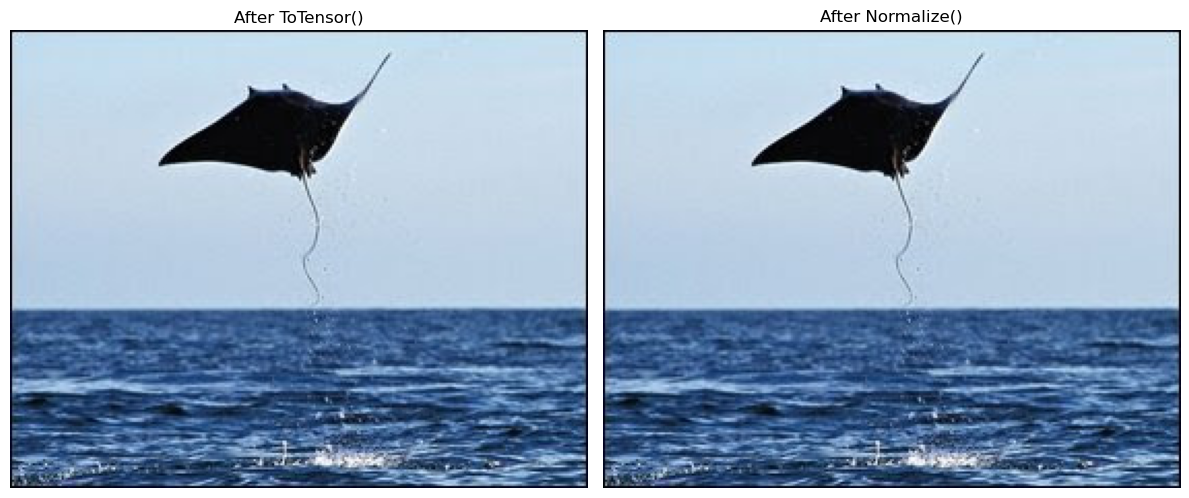

In [51]:
# Load image (RGB)
img_path = "../data/raw/0aozzfjx.jpg"  # replace with your image
img = Image.open(img_path).convert("RGB")

# Define transforms
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)

# Apply transforms
tensor_img = to_tensor(img)  # shape: (3, H, W), values: [0.0, 1.0]
normalized_tensor = normalize(tensor_img)  # values: [-1.0, 1.0]

# Convert back to displayable format
def imshow(tensor, title, is_normalized=False):
    np_img = tensor.numpy()
    if is_normalized:
        np_img = np_img * 0.5 + 0.5  # un-normalize from [-1,1] to [0,1]
    np_img = np.transpose(np_img, (1, 2, 0))  # CHW to HWC
    plt.imshow(np.clip(np_img, 0, 1))
    plt.title(title)
    plt.axis('off')

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
imshow(tensor_img, "After ToTensor()")

plt.subplot(1, 2, 2)
imshow(normalized_tensor, "After Normalize()", is_normalized=True)

plt.tight_layout()
plt.show()

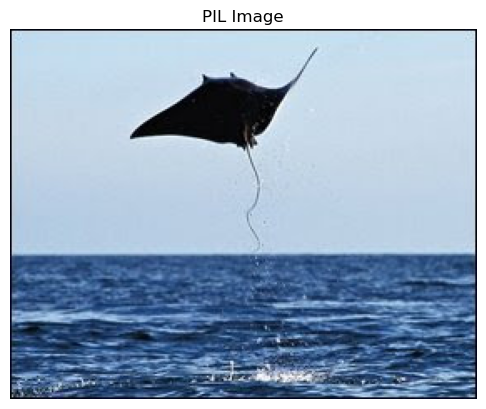

In [52]:
plt.imshow(img)
plt.title("PIL Image")
plt.axis("off")
plt.show()

In [53]:
normalized_tensor.shape

torch.Size([3, 222, 280])

In [54]:
tensor_img

tensor([[[0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0118, 0.0000],
         [0.0196, 0.7647, 0.8471,  ..., 0.8392, 0.7686, 0.0118],
         [0.0000, 0.8510, 0.7922,  ..., 0.8000, 0.8667, 0.0000],
         ...,
         [0.0000, 0.4588, 0.2353,  ..., 0.4039, 0.3882, 0.0000],
         [0.0000, 0.6275, 0.1255,  ..., 0.6980, 0.5294, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0157, 0.0000]],

        [[0.0000, 0.0196, 0.0118,  ..., 0.0118, 0.0235, 0.0000],
         [0.0392, 0.7922, 0.8824,  ..., 0.8902, 0.8039, 0.0314],
         [0.0196, 0.8902, 0.8471,  ..., 0.8745, 0.9176, 0.0157],
         ...,
         [0.0157, 0.5020, 0.2745,  ..., 0.4902, 0.4471, 0.0039],
         [0.0196, 0.6549, 0.1608,  ..., 0.7686, 0.5804, 0.0275],
         [0.0353, 0.0078, 0.0235,  ..., 0.0078, 0.0510, 0.0196]],

        [[0.0157, 0.0392, 0.0471,  ..., 0.0510, 0.0588, 0.0275],
         [0.0549, 0.8157, 0.9176,  ..., 0.9255, 0.8314, 0.0549],
         [0.0471, 0.9255, 0.8902,  ..., 0.9020, 0.9490, 0.

In [55]:
# how many processed images
!ls ../data/processed/ | wc -l

7624


## Some raw images

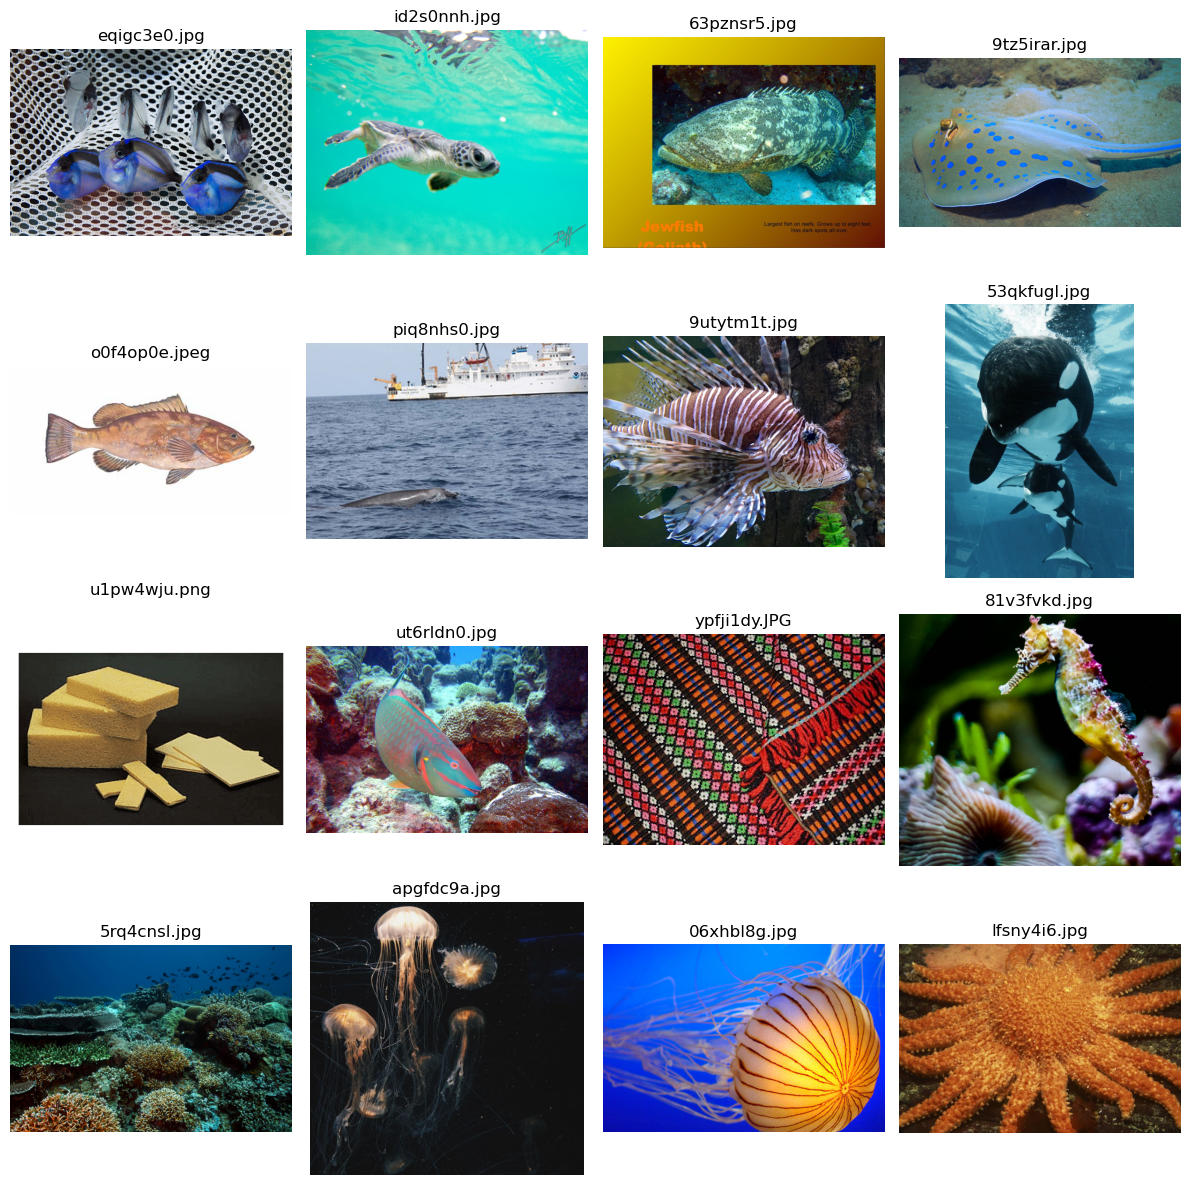

In [57]:
# Folder containing your images
image_folder = "../data/raw/"

# Get all valid image file paths
valid_extensions = ('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')
all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

# Randomly select 16 images
sample_images = random.sample(all_images, 16)

# Plot settings
plt.figure(figsize=(12, 12))

for i, img_file in enumerate(sample_images):
    img_path = os.path.join(image_folder, img_file)
    img = Image.open(img_path).convert("RGB")

    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_file), fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Some processed images

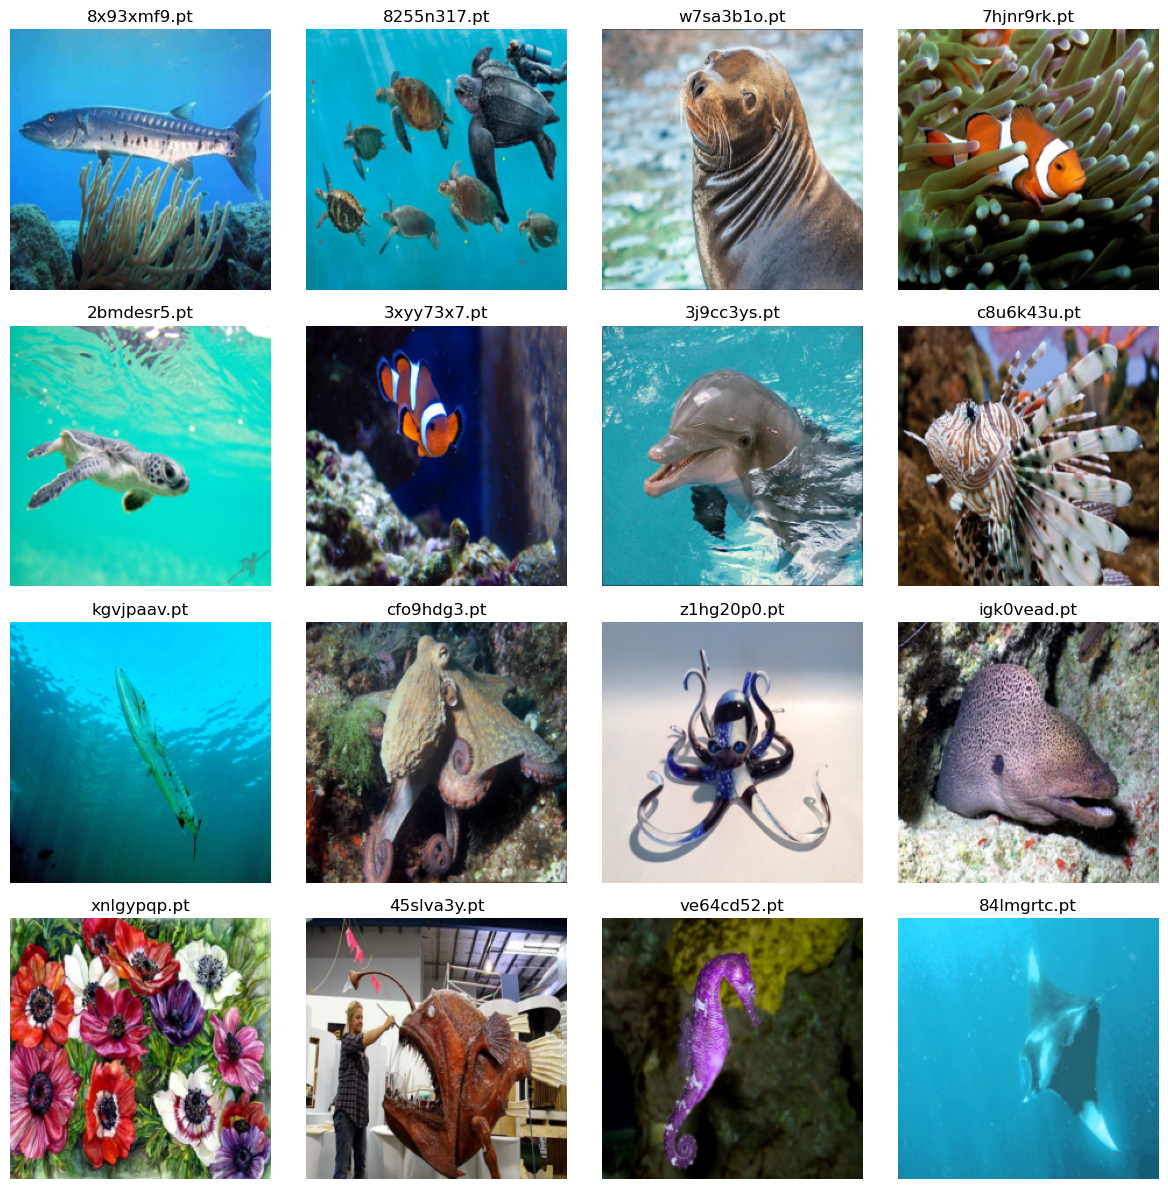

In [58]:
# Folder with .pt files
tensor_folder = "../data/processed/"

# List all .pt files
all_tensors = [f for f in os.listdir(tensor_folder) if f.endswith('.pt')]

# Randomly select 16
sample_tensors = random.sample(all_tensors, 16)

# Plot settings
plt.figure(figsize=(12, 12))

for i, tensor_file in enumerate(sample_tensors):
    tensor_path = os.path.join(tensor_folder, tensor_file)
    
    # Load the tensor
    img_tensor = torch.load(tensor_path)

    # If normalized ([-1, 1]), unnormalize to [0, 1]
    img_tensor = img_tensor * 0.5 + 0.5

    # Convert to NumPy and permute to HWC
    img_np = img_tensor.permute(1, 2, 0).numpy()

    # Plot
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_np)
    plt.title(os.path.basename(tensor_file), fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Comments**
- All the processed images are now in `data/processed/` folder.
- Each image is in Pytorch .pt format i.e. each image is a tensor now.
- Each image is normalized between [-1, 1].
- There are total 7624 images.